## Deep Learning
***

Quando trabalhamos com aprendizado de máquina, principalmente com aprendizado supervisionado, eu obtenho um conjunto de imagens de entrada, defino quais são as possíveis classes de saída, alimento essas informações em um modelo, faço o treinamento, o modelo aprende as relações matemáticas e gera no final um conjunto de pesos.

Depois posso apresentar a esse modelo outras imagens e ele será capaz de classifica-las.

Deep Learning ou aprendizado profundo é a técnica mais avançada em detecção de objetos atualmente baseado em camadas, quanto mais camadas tiver mais complexo será o problema que seu algoritmo será capaz de resolver.

Lembrando que o OpenCV não é usado para treinar o modelo de Deep Learning, ele é usado para executar o modelo.

Um excelente site para pegar datasets de imagens é http://image-net.org/

Podemos usar algoritmos já treinados com extensões do tipo **.caffe** com as especificações do modelo no arquivo **.prototxt** e um arquivo txt com as **labels** ou classes de saída.

As labels é uma lista de possíveis classes de saída, quando eu entrego uma imagem para um modelo, ele vai classificar (certo ou errado) em uma dessas classes, vai ser com uma precisão maior ou menor de acordo com o preparo que eu fiz na imagem.

Como ele sabe qual é a melhor classe se tem várias classes? Ele calcula a probabilidade, ou seja, ele utiliza na última camada uma função que calcula todas as probabilidades para cada uma dessas classes. A classe que tiver a maior probabilidade é a classe de saída da imagem de entrada.

***
### Exemplo 01
***

In [1]:
import cv2 as cv
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Carregando a imagem de entrada
image = cv.imread("./imagens/eagle.jpg")
imagem_colorida = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [3]:
# Carregando as labels
rows = open("./model/labels.txt").read().strip().split("\n")
classes = [row[row.find(" ") + 1:].split(",")[0] for row in rows]

In [4]:
# Converte a imagem de entrada para o formato que o modelo espera receber
# Nosso modelo pré-treinado é uma CNN e precisamos redimensionar a imagem
# de entrada para 224x224 pixels e na sequência normalizar a imagem
# para isso vamos subtrair a média e ao final, o shape da image será: (1, 3, 224, 224)
# Verificar as dimensões no arquivo .prototxt (input_dim) - (tamanho, qtd_canais, w, h)
# Quando você vai aplicar um modelo em uma imagem ele tem que ta no formato das imagens do treinamento
blob = cv.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))

In [5]:
# Vamos carregar o modelo pré treinado
modelo = cv.dnn.readNetFromCaffe(
    "./model/Googlenet.prototxt",
    "./model/Googlenet.caffemodel"
)

In [6]:
# Passa a imagem como parâmetro, executa o forward e obtém a saída
# forward é para realizar as previsões
modelo.setInput(blob)
start = time.time()
previsoes = modelo.forward()
end = time.time()
print("Classificação feita em {:.5} segundos".format(end - start))

Classificação feita em 0.036975 segundos


In [7]:
# Ordena os índices das probabilidades em ordem descendente, ou seja,
# probabilidade mais alta primeiro e imprime as 5 primeiras previsões
indices = np.argsort(previsoes[0])[::-1][:5]
print(indices)

[ 22  21  23 146  24]


In [8]:
# Loop pelas previsões e print das imagens
for (i, indice) in enumerate(indices):
    # Imprime a previsão de maior probabilidade
    if i == 0:
        text = "Label: {}, {:.2f}%".format(classes[indice], previsoes[0][indice] * 100)
        cv.putText(imagem_colorida, text, (5, 25), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
    # Mostra o label previsto e a probabilidade associada
    print("{}, label: {}, probabilidade: {:.5}".format(i+1, classes[indice], previsoes[0][indice]))

1, label: bald eagle, probabilidade: 0.99965
2, label: kite, probabilidade: 0.00034589
3, label: vulture, probabilidade: 6.0641e-06
4, label: albatross, probabilidade: 6.0567e-07
5, label: great grey owl, probabilidade: 9.141e-08


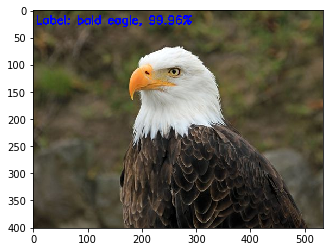

In [9]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.show()